<a href="https://colab.research.google.com/github/adhalya/estatistica_regressao_logistica_e_classificacao/blob/main/Estat%C3%ADstica_Modelos_de_Classifica%C3%A7%C3%A3o_e_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### DataSet Iris

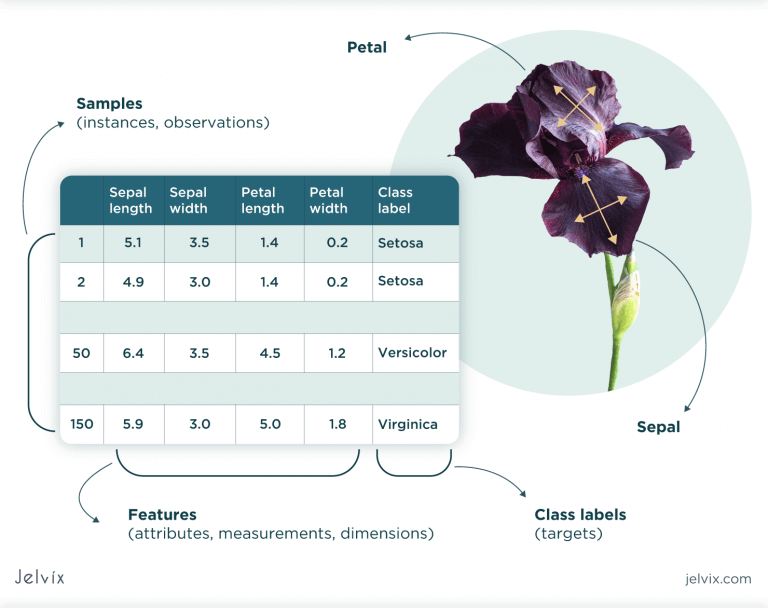


Descrição das Colunas:

- **Sepal_Length(cm):** Comprimento da Sépala
- **Sepal_Width(cm):** Largura da Sépala
- **Petal_Length(cm):** Comprimento da Pétala
- **Petal_Width(cm):** Largura da Pétala
- **Species:** Espécie

In [3]:
# Realizando a leitura do DataSet através do GitHub e Pandas
iris = pd.read_csv("https://raw.githubusercontent.com/adhalya/estatistica_regressao_logistica_e_classificacao/main/CSV/iris.csv")

# Visualizando as primeiras linhas do DataSet
iris.head()


Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

##### Análise inicial

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

1. Estatística Descritiva

In [6]:
# Compreendendo as features
iris.describe()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [7]:
# Compreendendo a variável target
iris.describe(include=['object'])

Species
count      150
unique       3
top     setosa
freq        50

In [8]:
# Analisando se no DataSet contém valores nulos e quais os tipos de dados das variáveis
analise_iris = pd.DataFrame(iris.dtypes)
analise_iris.columns = ["Dtype"]
analise_iris['Valores Nulos'] = iris.isnull().sum()
analise_iris['% Valores Nulos'] = (iris.isnull().sum() / iris.shape[0]) * 100
analise_iris['NUnique']= iris.nunique()

In [9]:
analise_iris

Dtype  Valores Nulos  % Valores Nulos  NUnique
Sepal_Length  float64              0              0.0       35
Sepal_Width   float64              0              0.0       23
Petal_Length  float64              0              0.0       43
Petal_Width   float64              0              0.0       22
Species        object              0              0.0        3

> *Através das análises iniciais conseguimos identificar as variáveis atributos (**Sepal_Length, Sepal_Width, Petal_Length e Petal_Width**) e a variável target (**Species**), ou seja, a variável que queremos identificar através do treinamento com as variáveis atributos. Temos um dataset contendo 150 linhas e nenhuma delas contém valores nulos. Todas as variáveis atributos são do tipo float, ou seja, não precisam ser transformadas já que o modelo não entende variáveis contendo strings. Também conseguimos identificar que o dataframe contém 50 linhas para cada uma das 3 espécies, ou seja, o dataframe está balanceado, não necessitando realizar Oversampling ou Undersampling*

2. Distribuição das Variáveis

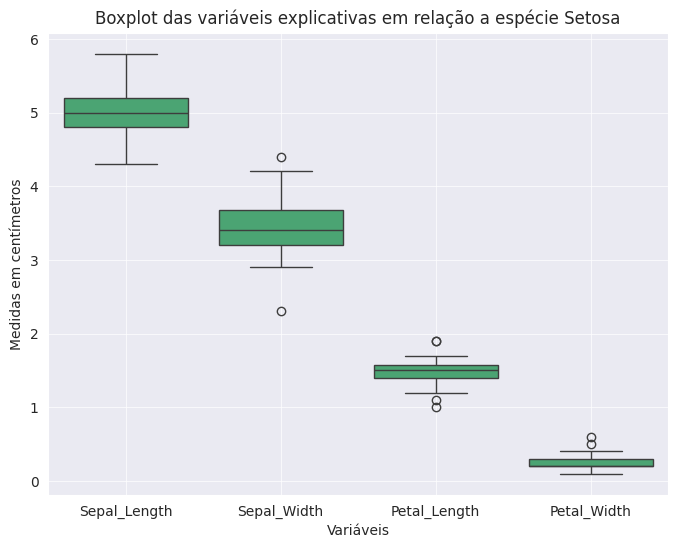

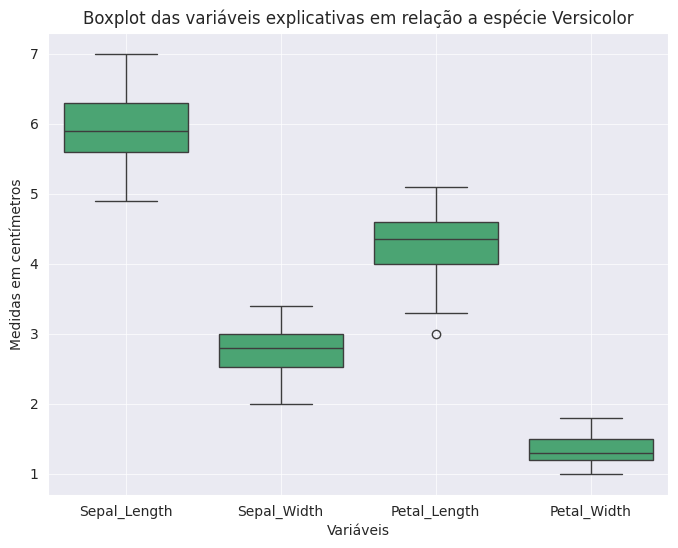

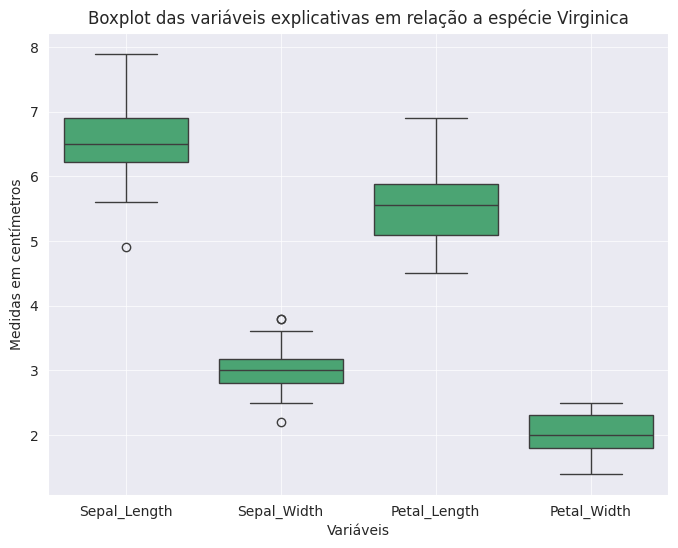

In [10]:
# @title Boxplot - Espécies x Dimensões Pétalas e Sépalas
# Filtrando os dataframes considerando as espécies
dados_setosa = iris[iris['Species'] == "setosa"]
dados_versicolor = iris[iris['Species'] == "versicolor"]
dados_virginica = iris[iris['Species'] == "virginica"]

# Plotando Boxplot da espécie Setosa
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.boxplot(data=dados_setosa[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], color='mediumseagreen')
plt.title('Boxplot das variáveis explicativas em relação a espécie Setosa')
plt.ylabel('Medidas em centímetros')
plt.xlabel('Variáveis')
plt.grid(color='white', linestyle='-', linewidth=0.5)
plt.show()

# Plotando Boxplot da espécie Versicolor
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.boxplot(data=dados_versicolor[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], color='mediumseagreen')
plt.title('Boxplot das variáveis explicativas em relação a espécie Versicolor')
plt.ylabel('Medidas em centímetros')
plt.xlabel('Variáveis')
plt.grid(color='white', linestyle='-', linewidth=0.5)
plt.show()

# Plotando Boxplot da espécie Virginica
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.boxplot(data=dados_virginica[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], color='mediumseagreen')
plt.title('Boxplot das variáveis explicativas em relação a espécie Virginica')
plt.ylabel('Medidas em centímetros')
plt.xlabel('Variáveis')
plt.grid(color='white', linestyle='-', linewidth=0.5)
plt.show()

> *Através do boxplot podemos conhecer quais as características das espécies considerando a dimensão das pétalas e das sépalas, além de poder saber a mediana, podemos identificar os quartis e os outliers presentes nas variáveis de cada espécie.*

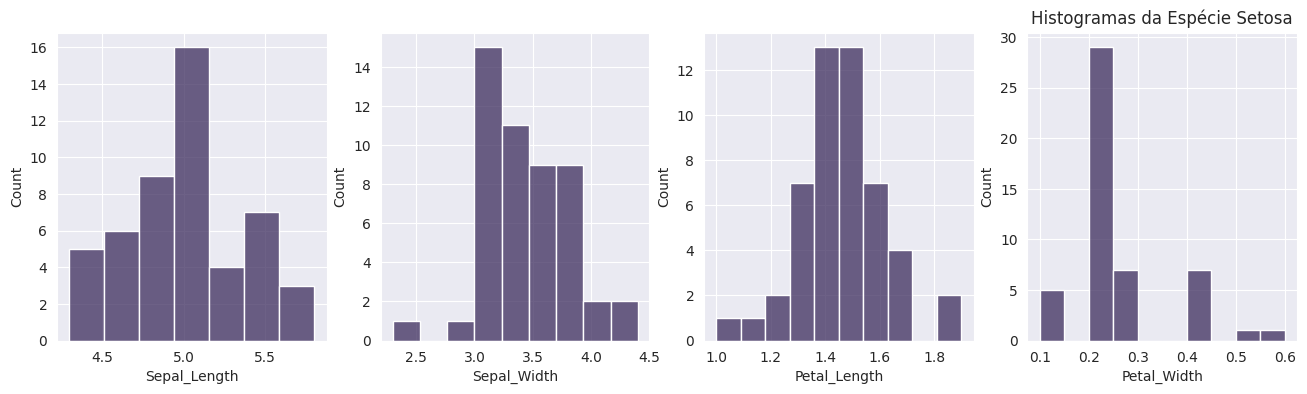

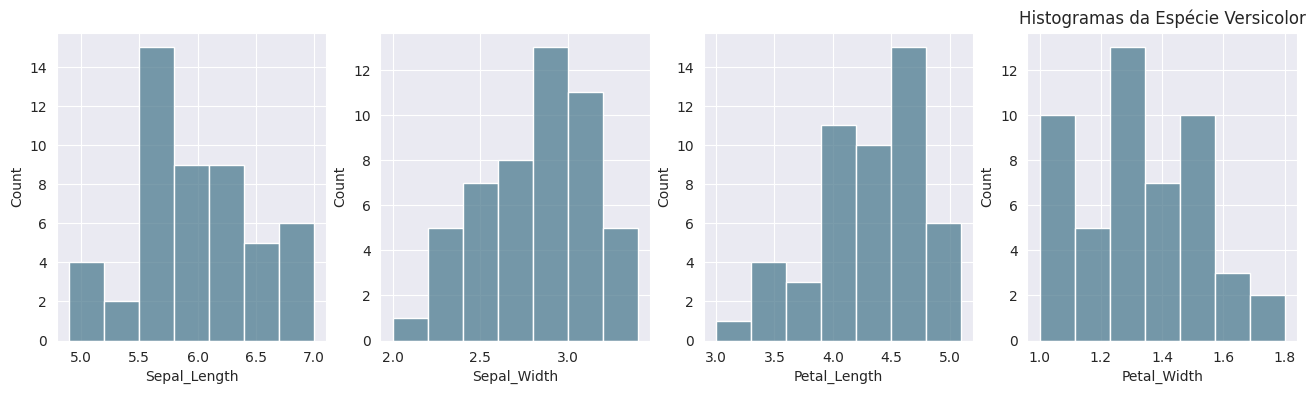

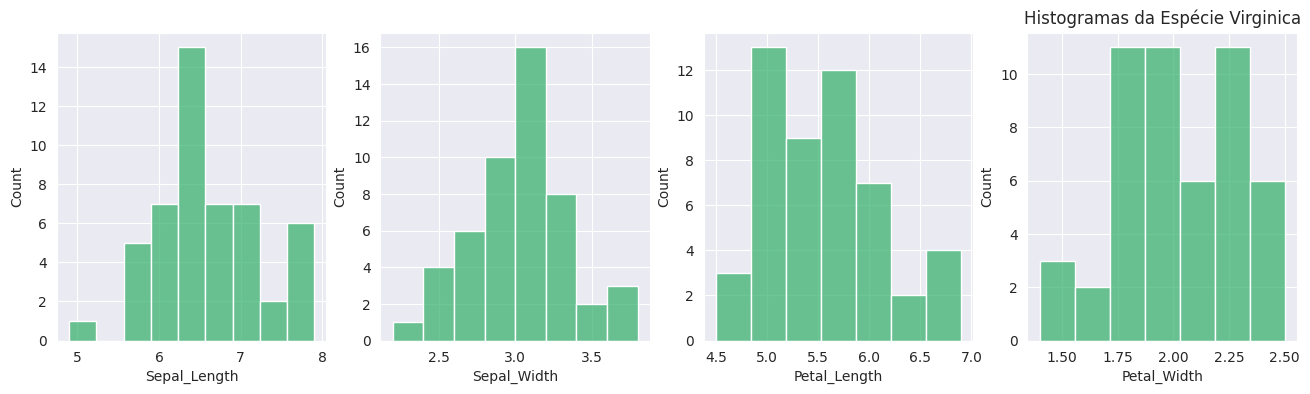

In [11]:
# @title Histogramas
# Histograma - Espécie Setosa
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
sns.set_style("darkgrid")

plt.title("Histogramas da Espécie Setosa")
for i, col in enumerate(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']):
    sns.histplot(data=dados_setosa[col], color='#3c2c5d', ax=axs[i])

plt.show()

# Histograma - Versicolor
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

plt.title("Histogramas da Espécie Versicolor")
for i, col in enumerate(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']):
    sns.histplot(data=dados_versicolor[col], color='#4D7B8F', ax=axs[i])

plt.show()

# Histograma - Virginica
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

plt.title("Histogramas da Espécie Virginica")
for i, col in enumerate(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']):
    sns.histplot(data=dados_virginica[col], color='mediumseagreen', ax=axs[i])

plt.show()

<Figure size 800x600 with 0 Axes>

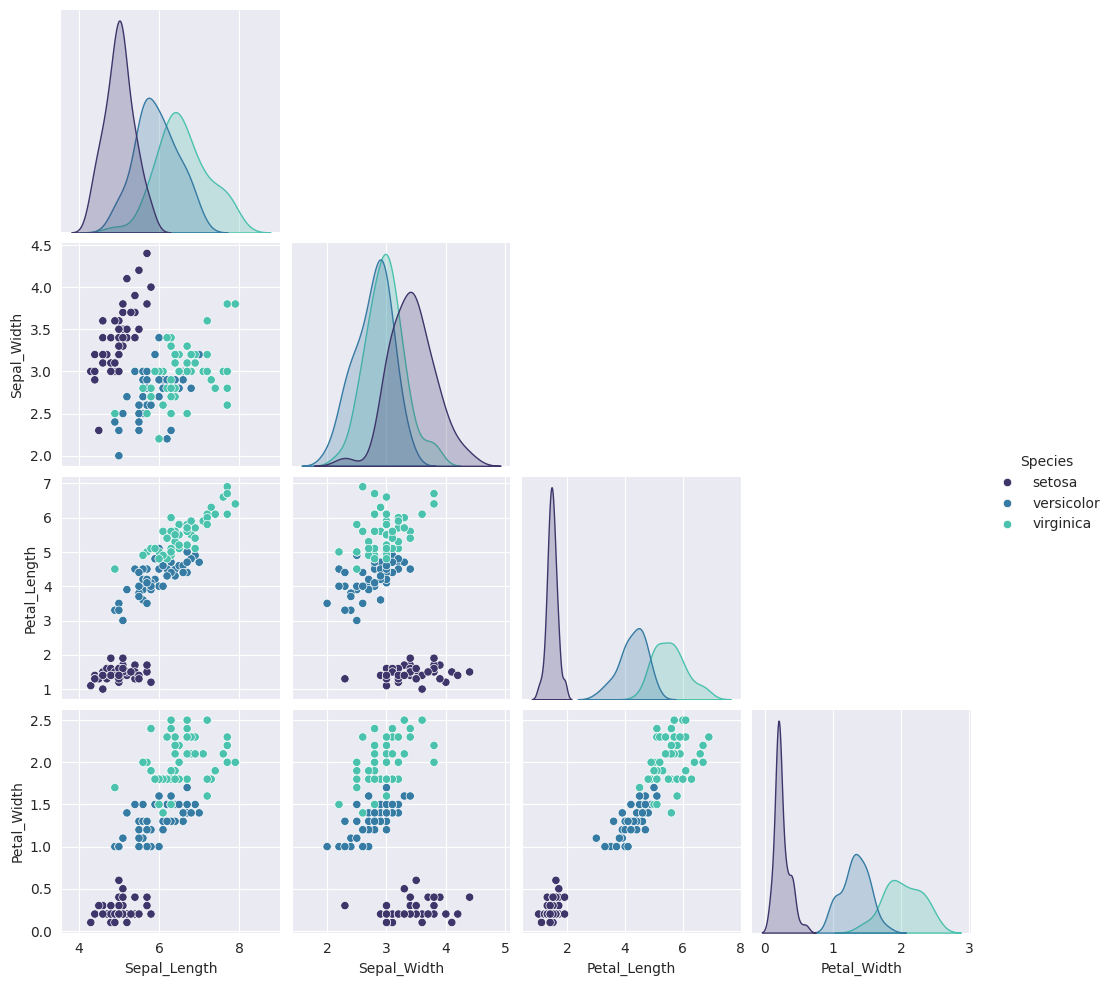

In [12]:
# @title Gráfico de Pares
plt.figure(figsize=(8, 6))
sns.pairplot(iris, hue='Species', palette='mako', diag_kind='kde', height=2.5, corner=True)
plt.show()

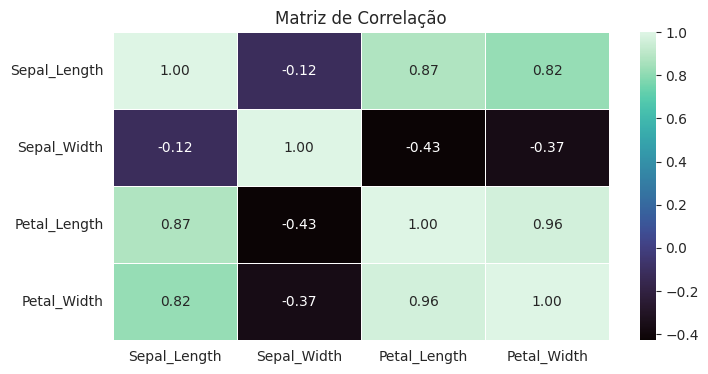

In [13]:
# @title Matriz de Correlação
# Calculando a correlação para entender como as variáveis numéricas se correlacionam umas com as outras
df_iris = iris.select_dtypes(include=['float64'])
corr_iris = df_iris.corr()

# Exibindo o gráfico de matriz de correlação
plt.figure(figsize=(8, 4))
sns.heatmap(corr_iris, annot=True, cmap='mako', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

> *O gráfico de pares e o histograma auxilia na comprensão do comportamento das espécies considerando as variáveis de dimensões das pétalas e sépalas. Temos uma correlação muito forte entre **Petal Width e Petal_Length**, entre **Petal_Width e Sepal_Length** e entre **Petal_Length e Sepal_Length**, indicando que são variáveis importantes para uma identificação precisa das espécies no modelo. Por não conter uma correlação muito forte, a variável **Sepal_Width** pode ser desconsiderada.*

##### Treinando o Modelo

In [14]:
# Importando os pacotes do Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [15]:
# Definindo as variáveis atributos e a variável target do modelo
features = ["Sepal_Length", "Petal_Length", "Petal_Width"]
target = ["Species"]

X = iris[features]
y = iris[target]

In [16]:
# Separando as variáveis de teste e treino do modelo na porcentagem 80-20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando a regressão logística para treinar o modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200)

In [17]:
# Aplicação do Modelo
y_pred = model.predict(X_test)

# Previsão da Probabilidade
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [18]:
X_test["Previsao_Modelo"] = y_pred
X_test["Probabilidade_Espécie"] = y_pred_proba

In [19]:
X_test

Sepal_Length  Petal_Length  Petal_Width Previsao_Modelo  \
73            6.1           4.7          1.2      versicolor   
18            5.7           1.7          0.3          setosa   
118           7.7           6.9          2.3       virginica   
78            6.0           4.5          1.5      versicolor   
76            6.8           4.8          1.4      versicolor   
31            5.4           1.5          0.4          setosa   
64            5.6           3.6          1.3      versicolor   
141           6.9           5.1          2.3       virginica   
68            6.2           4.5          1.5      versicolor   
82            5.8           3.9          1.2      versicolor   
110           6.5           5.1          2.0       virginica   
12            4.8           1.4          0.1          setosa   
36            5.5           1.3          0.2          setosa   
9             4.9           1.5          0.1          setosa   
19            5.1           1.5          0.3          setosa   
56            6.3           4.7          1.6      versicolor   
104           6.5           5.8          2.2       virginica   
69            5.6           3.9          1.1      versicolor   
55            5.7           4.5          1.3      versicolor   
132           6.4           5.6          2.2       virginica   
29            4.7           1.6          0.2          setosa   
127           6.1           4.9          1.8       virginica   
26            5.0           1.6          0.4          setosa   
128           6.4           5.6          2.1       virginica   
131           7.9           6.4          2.0       virginica   
145           6.7           5.2          2.3       virginica   
108           6.7           5.8          1.8       virginica   
143           6.8           5.9          2.3       virginica   
45            4.8           1.4          0.3          setosa   
30            4.8           1.6          0.2          setosa   

     Probabilidade_Espécie  
73                0.826687  
18                0.083152  
118               0.002086  
78                0.786014  
76                0.777768  
31                0.044605  
64                0.922722  
141               0.149970  
68                0.806920  
82                0.946957  
110               0.222869  
12                0.021051  
36                0.027085  
9                 0.028725  
19                0.035370  
56                0.670322  
104               0.024835  
69                0.944921  
55                0.830546  
132               0.039747  
29                0.033475  
127               0.386598  
26                0.043903  
128               0.050369  
131               0.019414  
145               0.105377  
108               0.072456  
143               0.017988  
45                0.022783  
30                0.035714

> *Para o treinamento do modelo foi utilizado somente as variáveis atributos que obtiveram um valor próximo a 1 na matriz de correlação, indicando que elas possuiam uma forte relação linear, por isto, para treinamento a variável **Sepal_Width** não foi utilizada.*

##### Testando o Modelo

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [21]:
# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


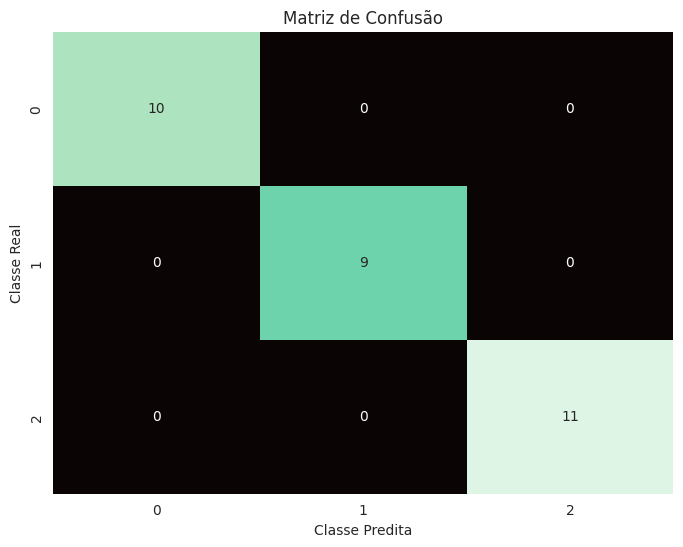

In [22]:
# @title Matriz de Confusão
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='mako', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

> *Através dos testes e da matriz de correlação percebemos que o modelo acertou 100% das espécies, podendo ser utilizado posteriormente para prever as espécies com novos dados.*

#### DataSet Digits

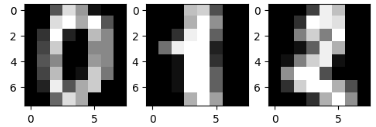

Descrição:
- Variáveis atributos: **pixel_x_x** As colunas atributos são constituídas por valores que definem a cor de cada pixel.
- Variável target: **target** Indica qual número a imagem forma quando todos os valores dos pixels estão unidos.


In [23]:
# Biblioteca de importação do dataset load_digits
from sklearn.datasets import load_digits

# Importando o dataset
digits_bunch = load_digits()
digits_bunch

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [24]:
# Trasformando o dataset de array para tabela com a biblioteca pandas
digits = pd.DataFrame(data=digits_bunch.data, columns=digits_bunch.feature_names)

# Incluindo a variável Target no dataset
digits['target'] = digits_bunch.target

digits.head()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0        0.0        0.0   
1        0.0        0.0       11.0       16.0       10.0        0.0   
2        0.0        0.0        3.0       11.0       16.0        9.0   
3        0.0        7.0       13.0       13.0        9.0        0.0   
4        0.0        0.0        2.0       16.0        4.0        0.0   

   pixel_7_7  target  
0        0.0       0  
1        0.0       1  
2        0.0       2  
3        0.0       3  
4        0.0       4  

[5 rows x 65 columns]

##### Análise Inicial

In [25]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [26]:
digits.describe()

pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       4.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      11.000000     0.000000     0.000000     0.000000     3.000000  ...   
max      16.000000    16.000000    15.000000     2.000000    16.000000  ...   

         pixel_6_7    pixel_7_0    pixel_7_1    pixel_7_2    pixel_7_3  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.206455     0.000556     0.279354     5.557596    12.089037   
std       0.984401     0.023590     0.934302     5.103019     4.374694   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000    11.000000   
50%       0.000000     0.000000     0.000000     4.000000    13.000000   
75%       0.000000     0.000000     0.000000    10.000000    16.000000   
max      13.000000     1.000000     9.000000    16.000000    16.000000   

         pixel_7_4    pixel_7_5    pixel_7_6    pixel_7_7       target  
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  
mean     11.809126     6.764051     2.067891     0.364496     4.490818  
std       4.933947     5.900623     4.090548     1.860122     2.865304  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      10.000000     0.000000     0.000000     0.000000     2.000000  
50%      14.000000     6.000000     0.000000     0.000000     4.000000  
75%      16.000000    12.000000     2.000000     0.000000     7.000000  
max      16.000000    16.000000    16.000000    16.000000     9.000000  

[8 rows x 65 columns]

In [27]:
# Analisando se no DataSet contém valores nulos
analise_digits = pd.DataFrame(digits.dtypes)
analise_digits.columns = ["Dtype"]
analise_digits['Valores Nulos'] = digits.isnull().sum()
analise_digits['% Valores Nulos'] = (digits.isnull().sum() / digits.shape[0]) * 100
analise_digits['NUnique']= digits.nunique()

analise_digits

Dtype  Valores Nulos  % Valores Nulos  NUnique
pixel_0_0  float64              0              0.0        1
pixel_0_1  float64              0              0.0        9
pixel_0_2  float64              0              0.0       17
pixel_0_3  float64              0              0.0       17
pixel_0_4  float64              0              0.0       17
...            ...            ...              ...      ...
pixel_7_4  float64              0              0.0       17
pixel_7_5  float64              0              0.0       17
pixel_7_6  float64              0              0.0       17
pixel_7_7  float64              0              0.0       17
target       int64              0              0.0       10

[65 rows x 4 columns]

> *O dataset contém 1797 linhas e não possuem dados nulos. As variáveis atributos são do tipo **float** enquanto que a variável target é do tipo **int**, não necessitando passar por transformação de tipos.*

##### Treinando o Modelo

In [28]:
# Definindo as variáveis atributos e a variável target do modelo
digits = pd.DataFrame(data=digits_bunch.data, columns=[f'pixel_{i}' for i in range(digits_bunch.data.shape[1])])
digits['target'] = digits_bunch.target

features = [f'pixel_{i}' for i in range(digits_bunch.data.shape[1])]
target = "target"

X1 = digits[features]
y1 = digits[target]


In [29]:
# Separando as variáveis de teste e treino do modelo na porcentagem 80-20.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Aplicando a regressão logística para treinar o modelo
model1 = LogisticRegression(max_iter=200)
model1.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [30]:
# Aplicação do Modelo
y_pred1 = model1.predict(X_test1)

# Previsão da Probabilidade
y_pred_proba1 = model1.predict_proba(X_test1)[:, 1]

In [31]:
# Testando o Modelo
X_test1["Previsao_Modelo"] = y_pred1
X_test1["Probabilidade_Número"] = y_pred_proba1

In [32]:
X_test1

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
1245      0.0      0.0      0.0      7.0     12.0      0.0      0.0      0.0   
220       0.0      0.0     11.0     16.0      8.0      0.0      0.0      0.0   
1518      0.0      0.0      8.0     15.0     12.0      4.0      0.0      0.0   
438       0.0      0.0      2.0     12.0     12.0     12.0      9.0      2.0   
1270      0.0      2.0     13.0     16.0     10.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1731      0.0      0.0      0.0      2.0     14.0      0.0      0.0      0.0   
1630      0.0      0.0      6.0     16.0     15.0      5.0      0.0      0.0   
1037      0.0      0.0      7.0     15.0     16.0      8.0      0.0      0.0   
965       0.0      0.0      7.0     16.0     12.0      1.0      0.0      0.0   
1461      0.0      0.0     14.0     12.0     12.0     13.0      0.0      0.0   

      pixel_8  pixel_9  ...  pixel_56  pixel_57  pixel_58  pixel_59  pixel_60  \
1245      0.0      0.0  ...       0.0       0.0       0.0       9.0      14.0   
220       0.0      6.0  ...       0.0       0.0      13.0      16.0      11.0   
1518      0.0      5.0  ...       0.0       0.0      13.0      16.0      15.0   
438       0.0      0.0  ...       0.0       0.0       3.0      15.0       3.0   
1270      0.0      6.0  ...       0.0       3.0      15.0      16.0      16.0   
...       ...      ...  ...       ...       ...       ...       ...       ...   
1731      0.0      0.0  ...       0.0       0.0       0.0       4.0      10.0   
1630      0.0      0.0  ...       0.0       0.0       6.0      16.0      16.0   
1037      0.0      0.0  ...       0.0       0.0       5.0      11.0      10.0   
965       0.0      0.0  ...       0.0       0.0       7.0      16.0      16.0   
1461      0.0      1.0  ...       0.0       1.0      10.0      16.0      15.0   

      pixel_61  pixel_62  pixel_63  Previsao_Modelo  Probabilidade_Número  
1245      14.0       5.0       0.0                6          7.100585e-11  
220        1.0       0.0       0.0                9          8.110726e-12  
1518       8.0       0.0       0.0                3          1.699772e-16  
438        0.0       0.0       0.0                7          2.264260e-07  
1270      10.0       1.0       0.0                2          1.680383e-10  
...        ...       ...       ...              ...                   ...  
1731       0.0       0.0       0.0                4          2.570505e-10  
1630      12.0       1.0       0.0                3          2.129473e-08  
1037      10.0       0.0       0.0                8          3.693400e-05  
965       16.0       4.0       0.0                3          4.583474e-11  
1461       5.0       0.0       0.0                5          2.205914e-13  

[360 rows x 66 columns]

#### Testando o Modelo

In [33]:
# Calculando as métricas
accuracy1 = accuracy_score(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1, average='macro')
recall1 = recall_score(y_test1, y_pred1, average='macro')

print(f'Accuracy: {accuracy1:.2f}')
print(f'Precision: {precision1:.2f}')
print(f'Recall: {recall1:.2f}')

Accuracy: 0.97
Precision: 0.98
Recall: 0.98


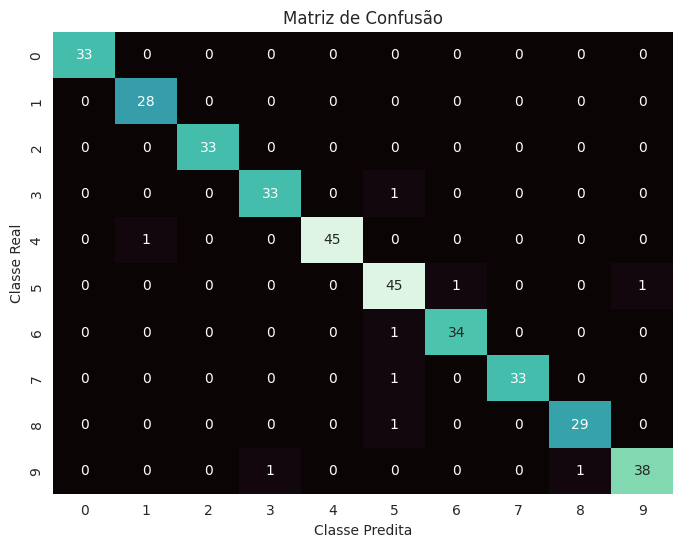

In [34]:
# @title Matriz de Confusão
# Calculando a matriz de confusão
cm1 = confusion_matrix(y_test1, y_pred1)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='mako', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

> *Pelos resultados obtidos dos testes podemos perceber que o modelo conseguiu prever uma grande parte dos resultados, tendo apenas alguns pequenos erros, podemos dizer que foi um resultado positivo já que a acurácia, a precisão e o recall estão com valores próximos a 1.*

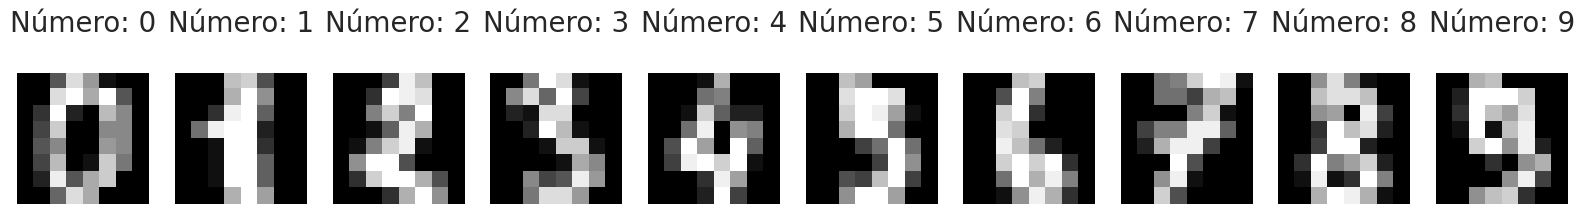

In [35]:
# @title Gráfico de Visualização dos Dados
plt.figure(figsize=(20, 4))

for index, (image, label) in enumerate(zip(digits.iloc[0:10, :-1].values, digits.iloc[0:10, -1].values)):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Número: %i\n' % label, fontsize=20)
    plt.axis('off')

plt.show()